# Association - Apriori

- Support. Support(A) = (Transactions containing (A))/(Total Transactions)
- Confidence. Confidence(A→B) = Prob(A and B))/Supp(A)
- Lift. Lift(A→B) = (Prob(A and B))/(Supp(A) x Supp(B))
- Lift alt. Lift(A→B) = (Confidence (A→B))/(Support (B))
- Conviction:  Conviction(A→B) = (Not B)/(Not B | A)
- Conviction alt: Convition(A→B) = 1-Sup(B) / 1-Conf(A→B)

### Step 1 - Import libraries

In [4]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for ploting frequency distribution chart
from efficient_apriori import apriori # for association analysis

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

### Step 2 - Read in data and analyze frequency distributions

This data contains purchase lists at US supermarkets

In [6]:
# Ingest the data
df = pd.read_csv(main_dir+'/data/Market_Basket_Optimisation.csv', encoding='utf-8', header=None)
# Show dataframe
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create a single list of items and plot their frequency distribution

In [7]:
# Put all transactions into a single list
txns=df.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
df_list=pd.DataFrame(txns)
df_list['Count']=1

# Group by items and rename columns
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) # percentage
df_list=df_list.rename(columns={0 : 'Item'})

# Show dataframe
df_list

,Item,Count,Percentage
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000238
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041889
43,french fries,1282,0.043660
100,spaghetti,1306,0.044478
37,eggs,1348,0.045908


##### Plot bar chart

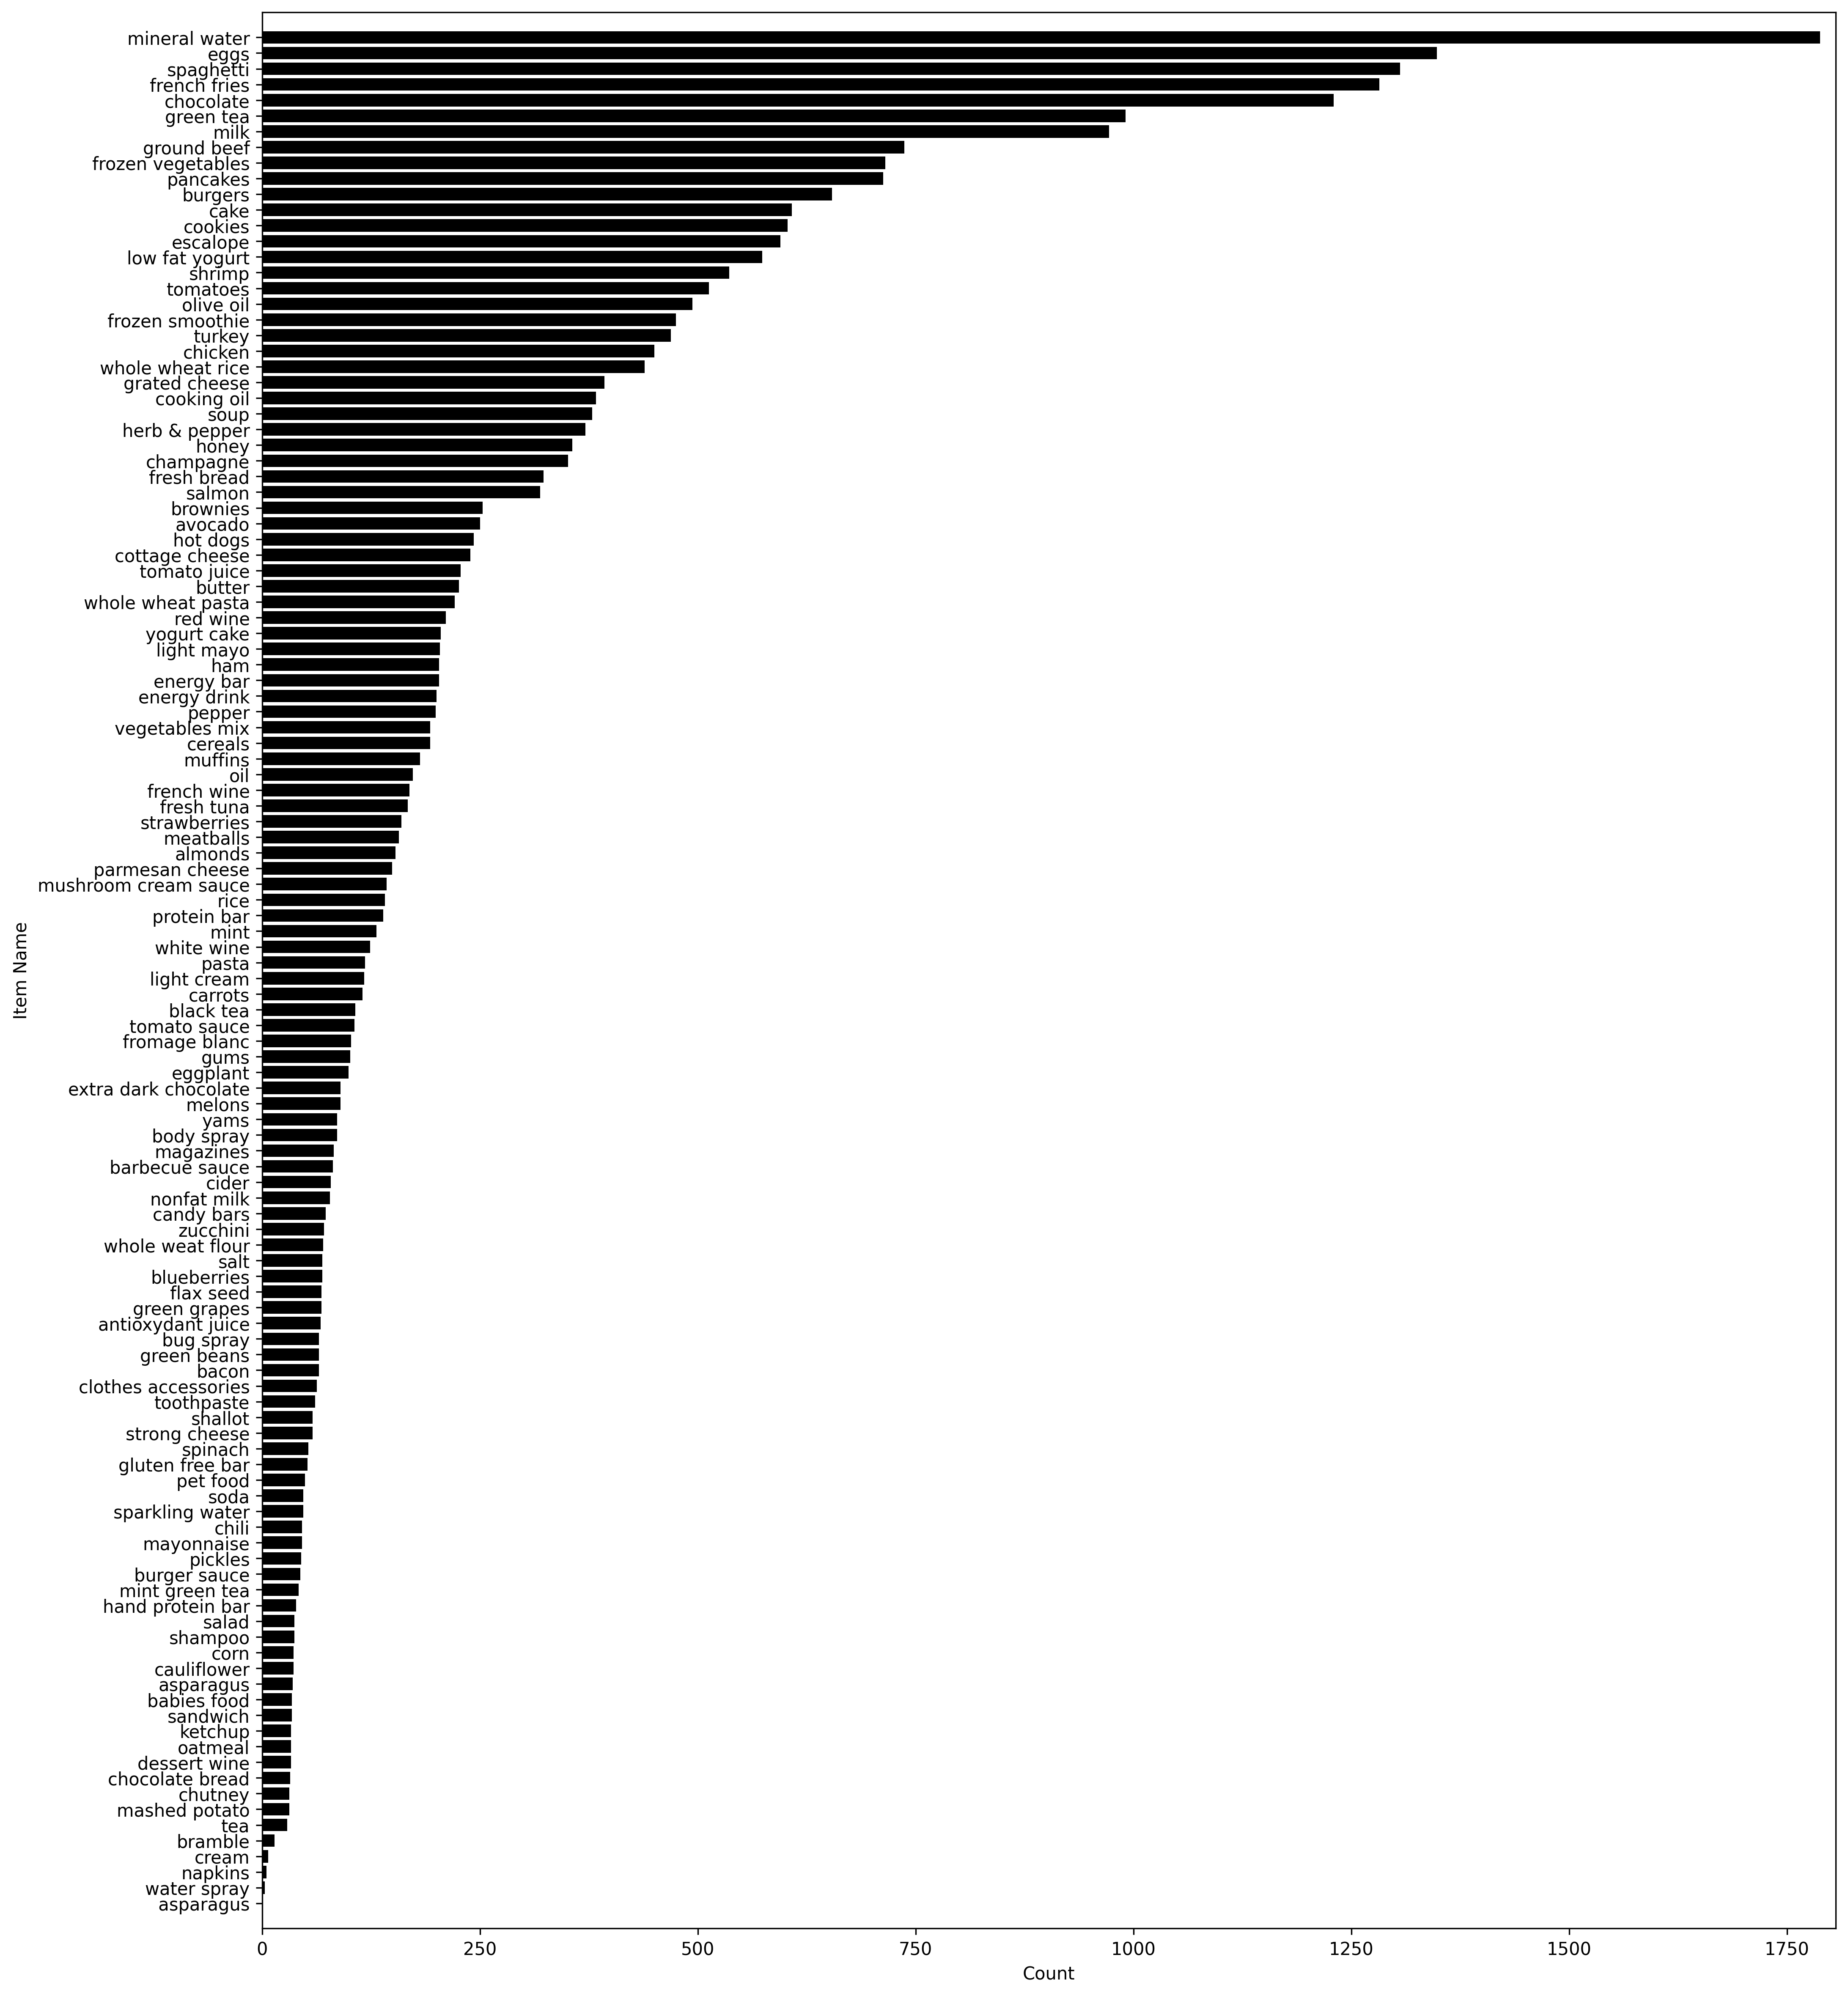

In [8]:
# Draw a horizontal bar chart
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins(0.01)   
plt.show()

### Step 3 - Run Apriori algorithm

##### Create a list of lists to feed into Apriori algorithm

In [14]:
# Create a list of lists from a dataframe
txns2=df.stack().groupby(level=0).apply(list).tolist()
# Show what it looks like
txns2

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

##### Run apriori algorithm on supermarket transactions data

In [15]:
itemsets, rules = apriori(txns2, min_support=0.03, min_confidence=0.2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 36 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 630 candidate itemsets of length 2.
  Found 18 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 14 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



##### Print itemsets

In [16]:
itemsets

{1: {('shrimp',): 536,
  ('olive oil',): 494,
  ('tomato juice',): 228,
  ('frozen smoothie',): 475,
  ('low fat yogurt',): 574,
  ('mineral water',): 1788,
  ('honey',): 356,
  ('salmon',): 319,
  ('cottage cheese',): 239,
  ('green tea',): 991,
  ('avocado',): 250,
  ('burgers',): 654,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('whole wheat rice',): 439,
  ('milk',): 972,
  ('french fries',): 1282,
  ('soup',): 379,
  ('spaghetti',): 1306,
  ('frozen vegetables',): 715,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('chicken',): 450,
  ('chocolate',): 1229,
  ('tomatoes',): 513,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('fresh bread',): 323,
  ('ground beef',): 737,
  ('escalope',): 595,
  ('herb & pepper',): 371,
  ('cake',): 608,
  ('hot dogs',): 243,
  ('brownies',): 253,
  ('butter',): 226},
 2: {('green tea', 'mineral water'): 233,
  ('milk', 'mineral water'): 360,
  ('eggs', 'mineral water'): 382,
  ('eggs', 'spaghetti'): 274,
  ('mineral water

##### Print rules

In [17]:
rules

[{green tea} -> {mineral water},
 {mineral water} -> {milk},
 {milk} -> {mineral water},
 {mineral water} -> {eggs},
 {eggs} -> {mineral water},
 {spaghetti} -> {eggs},
 {eggs} -> {spaghetti},
 {spaghetti} -> {mineral water},
 {mineral water} -> {spaghetti},
 {chocolate} -> {eggs},
 {pancakes} -> {mineral water},
 {spaghetti} -> {milk},
 {milk} -> {spaghetti},
 {ground beef} -> {mineral water},
 {spaghetti} -> {ground beef},
 {ground beef} -> {spaghetti},
 {french fries} -> {chocolate},
 {chocolate} -> {french fries},
 {mineral water} -> {chocolate},
 {chocolate} -> {mineral water},
 {french fries} -> {eggs},
 {eggs} -> {french fries},
 {frozen vegetables} -> {mineral water},
 {spaghetti} -> {chocolate},
 {chocolate} -> {spaghetti},
 {milk} -> {chocolate},
 {milk} -> {eggs}]

In [63]:
len(rules)

27

##### Print association rules ordered by highest lift and conviction

In [19]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.572, conv: 1.218)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{spaghetti} -> {milk} (conf: 0.204, supp: 0.035, lift: 1.572, conv: 1.093)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {chocolate} (conf: 0.248, supp: 0.032, lift: 1.513, conv: 1.112)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)
{chocolate} -> {spaghett

# End of Program